In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from util.models.cnn_net import cnn_net

Using TensorFlow backend.


In [2]:
train_path = '../../BSc-PRO-res/backprojection/train'
valid_path = '../../BSc-PRO-res/backprojection/valid'
test_path = '../../BSc-PRO-res/backprojection/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 282 images belonging to 3 classes.
Found 76 images belonging to 3 classes.
Found 38 images belonging to 3 classes.


In [3]:
model = cnn_net()

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=282 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=76 // batch_size)

Epoch 1/100
8/8 [==============================] - 4s 474ms/step - loss: 6.3991 - acc: 0.4711 - val_loss: 6.9836 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 3s 346ms/step - loss: 2.2522 - acc: 0.5634 - val_loss: 0.8148 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 3s 371ms/step - loss: 0.7552 - acc: 0.6172 - val_loss: 0.5458 - val_acc: 0.6818
Epoch 4/100
8/8 [==============================] - 3s 370ms/step - loss: 0.5490 - acc: 0.7792 - val_loss: 0.5127 - val_acc: 0.7969
Epoch 5/100
8/8 [==============================] - 3s 383ms/step - loss: 0.5409 - acc: 0.7759 - val_loss: 0.5621 - val_acc: 0.7727
Epoch 6/100
8/8 [==============================] - 3s 379ms/step - loss: 0.4798 - acc: 0.7656 - val_loss: 0.4603 - val_acc: 0.7955
Epoch 7/100
8/8 [==============================] - 3s 419ms/step - loss: 0.4649 - acc: 0.7703 - val_loss: 0.5361 - val_acc: 0.7500
Epoch 8/100
8/8 [==============================] - 3s 402ms/step - loss: 0.4340 - a

8/8 [==============================] - 3s 436ms/step - loss: 0.3128 - acc: 0.9217 - val_loss: 0.2672 - val_acc: 0.9318
Epoch 64/100
8/8 [==============================] - 4s 441ms/step - loss: 0.2576 - acc: 0.8910 - val_loss: 0.3222 - val_acc: 0.9219
Epoch 65/100
8/8 [==============================] - 3s 425ms/step - loss: 0.2310 - acc: 0.9287 - val_loss: 0.2012 - val_acc: 0.9773
Epoch 66/100
8/8 [==============================] - 3s 435ms/step - loss: 0.2568 - acc: 0.9083 - val_loss: 0.3410 - val_acc: 0.9545
Epoch 67/100
8/8 [==============================] - 3s 437ms/step - loss: 0.2371 - acc: 0.9161 - val_loss: 0.3176 - val_acc: 0.9531
Epoch 68/100
8/8 [==============================] - 3s 434ms/step - loss: 0.2470 - acc: 0.9271 - val_loss: 0.3251 - val_acc: 0.8864
Epoch 69/100
8/8 [==============================] - 3s 435ms/step - loss: 0.3063 - acc: 0.8945 - val_loss: 0.2030 - val_acc: 0.9773
Epoch 70/100
8/8 [==============================] - 3s 435ms/step - loss: 0.2548 - acc: 0

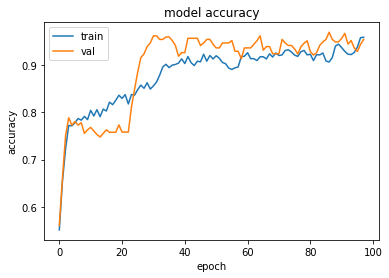

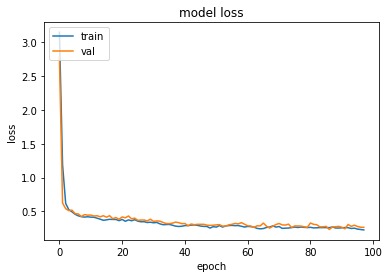

In [5]:
plot_history(history, mean_N=3)

In [6]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[0.40200597047805786, 0.9375]